In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_1652\2473725183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_1652\2473725183.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


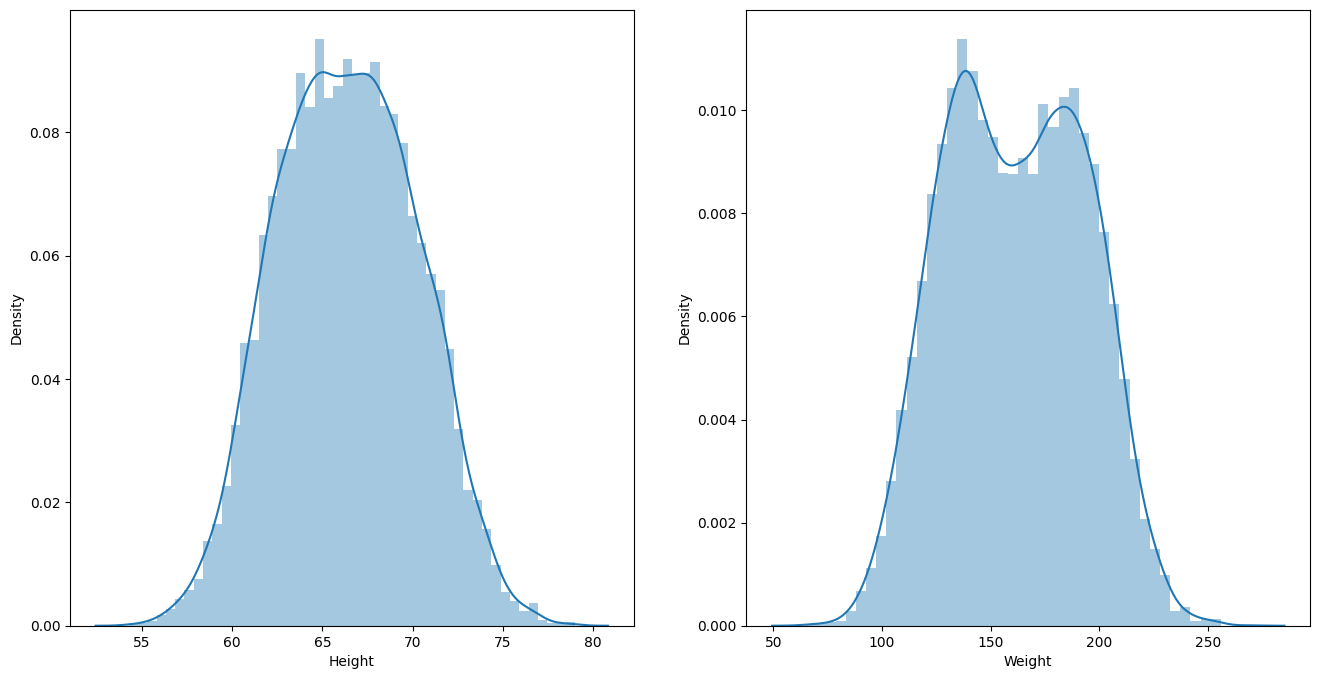

In [4]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
sns.distplot(df['Weight'])
plt.show()

<Axes: >

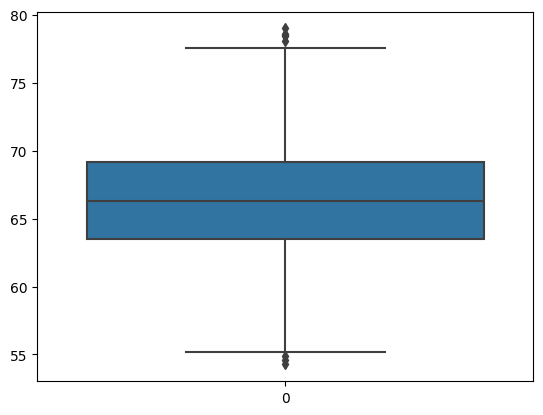

In [5]:
sns.boxplot(df['Height'])

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
upperlimit = df['Height'].quantile(0.99)
lowerlimit = df['Height'].quantile(0.01)

In [9]:
upperlimit,lowerlimit

(74.7857900583366, 58.13441158671655)

In [10]:
df[(df['Height'] >= upperlimit) | (df['Height'] <= lowerlimit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [11]:
new_df = df[(df['Height'] <= upperlimit) & (df['Height'] >= lowerlimit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_1652\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

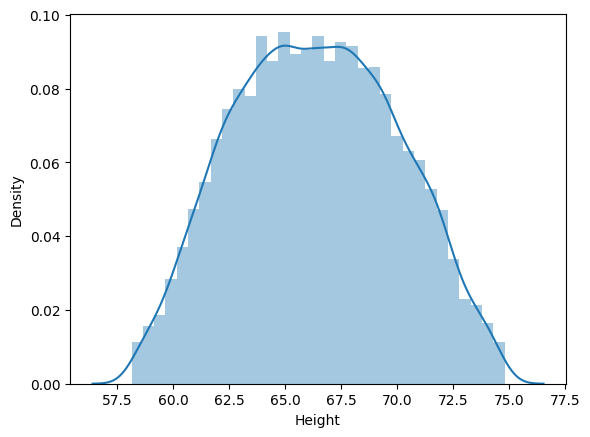

In [15]:
sns.distplot(new_df['Height'])

<Axes: >

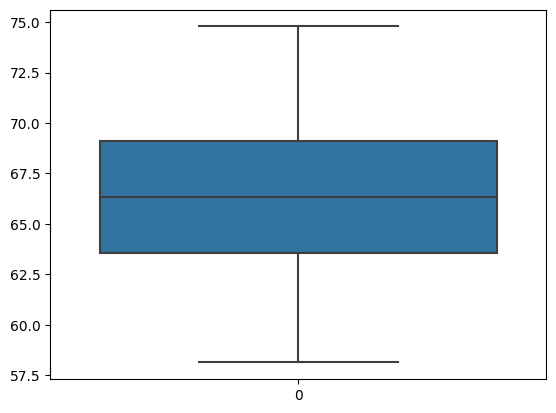

In [16]:
sns.boxplot(new_df['Height'])

In [26]:
# Capping --> Winsorization
new_df_cap = df.copy()
new_df_cap['Height'] = np.where(
    df['Height']>=upperlimit,
    upperlimit,
    np.where(
        df['Height']<=lowerlimit,
        lowerlimit,
        df['Height']
    )
)

In [22]:
new_df_cap.shape

(10000,)

In [27]:
new_df_cap['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_1652\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

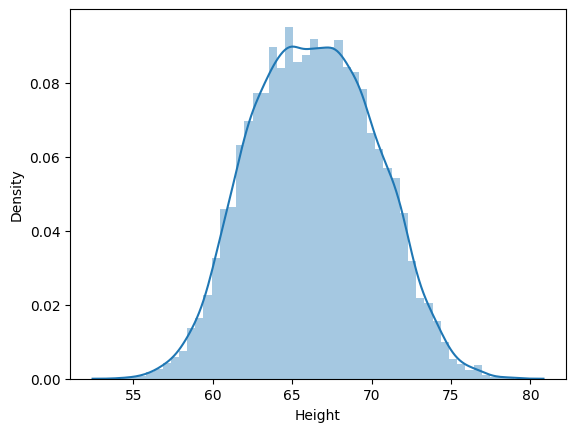

In [28]:
sns.distplot(df['Height'])

<Axes: >

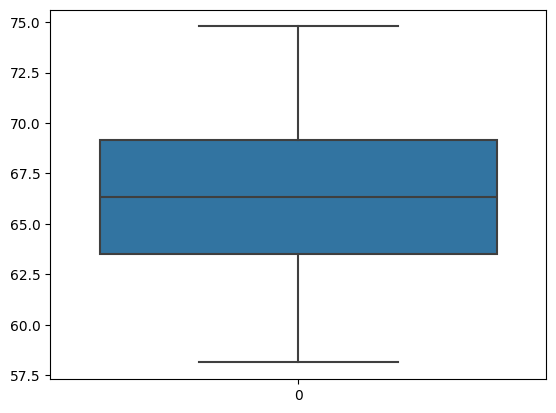

In [30]:
sns.boxplot(new_df_cap['Height'])